#### 다중분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

In [1]:
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.5f}'.format


- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 ==> 1D으로 64개 피쳐
    * 이미지 라벨/타겟 => 숫자 0 ~ 9까지 즉, 총 10개 클래스

In [2]:
## 데이터 로딩
featureDF, targetSR=load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위
featureDF=featureDF/255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [3]:
featureDF.head(1), targetSR.head()

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   
 
    pixel_7_6  pixel_7_7  
 0    0.00000    0.00000  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int32)

In [4]:
## 이미지 데이터 시각화
import matplotlib.pyplot as plt

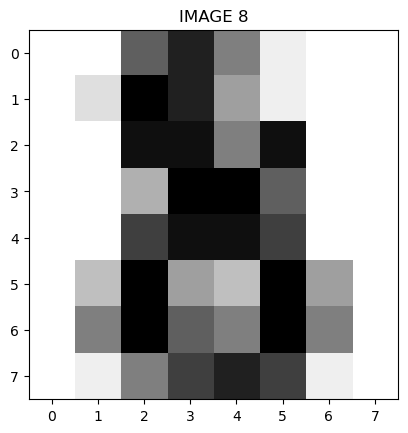

In [5]:
# 1D ==> 2D 형태로 이미지 데이터
imgData=featureDF.iloc[1796].to_numpy().reshape(-1,8)
imgData.shape

# 시각화
plt.imshow(imgData, cmap='binary')
plt.title(f'IMAGE {targetSR[1796]}')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [6]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, stratify=targetSR, random_state=10)

In [7]:
featureDF.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,...,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000
mean,0.00000,0.00119,0.02041,0.04642,0.04646,0.02267,0.00534,0.00051,0.00002,0.00782,...,0.01461,0.00081,0.00000,0.00110,0.02179,0.04741,0.04631,0.02653,0.00811,0.00143
std,0.00000,0.00356,0.01865,0.01666,0.01681,0.02222,0.01304,0.00407,0.00037,0.01253,...,0.01929,0.00386,0.00009,0.00366,0.02001,0.01716,0.01935,0.02314,0.01604,0.00729
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00392,0.03922,0.03922,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00392,0.04314,0.03922,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.01569,0.05098,0.05098,0.01569,0.00000,0.00000,0.00000,0.00000,...,0.00392,0.00000,0.00000,0.00000,0.01569,0.05098,0.05490,0.02353,0.00000,0.00000
75%,0.00000,0.00000,0.03529,0.05882,0.05882,0.04314,0.00000,0.00000,0.00000,0.01176,...,0.02745,0.00000,0.00000,0.00000,0.03922,0.06275,0.06275,0.04706,0.00784,0.00000
max,0.00000,0.03137,0.06275,0.06275,0.06275,0.06275,0.06275,0.05882,0.00784,0.06275,...,0.06275,0.05098,0.00392,0.03529,0.06275,0.06275,0.06275,0.06275,0.06275,0.06275


In [8]:
# 모듈 로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
ovr_clf= OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [10]:
# 모델 파라미터
print(f'ovr_clfestimators_ : {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_ : {ovr_clf.classes_}')
print(f'ovr_clf.classes_ : {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_}')

ovr_clfestimators_ : 10개
ovr_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.classes_ : 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [11]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[0 분류기] [[ 0.00000000e+00 -1.17211304e-01 -3.61976716e-01  6.37992922e-01
  -2.59516080e-01 -1.28004235e+00 -5.49554643e-01 -5.15394269e-02
  -2.48867098e-03 -4.50770969e-01  8.75529916e-01  6.75669778e-01
   7.61063082e-01  1.42181524e+00 -3.72707245e-01 -4.79082752e-02
  -8.76059290e-04  4.83967023e-01  1.73526178e+00 -5.66661564e-01
  -1.82795465e+00  2.02796255e+00  6.80700634e-01 -2.29999080e-02
  -2.33809952e-04  1.17166680e+00  1.43124099e+00 -2.77339186e+00
  -4.06945241e+00  6.21786489e-01  1.75117326e+00 -1.03944146e-03
   0.00000000e+00  1.44042261e+00  1.66074394e+00 -3.35466822e+00
  -4.16837941e+00 -1.82033356e-01  1.70005379e+00  0.00000000e+00
  -6.22709065e-03  7.53400694e-01  2.70397833e+00 -2.23501260e+00
  -2.41565152e+00  1.07409288e+00  9.19098746e-01 -1.27278179e-02
  -1.92354211e-03  2.32108843e-02  2.27842435e+00  3.91210660e-01
   5.69341433e-01  1.80144114e+00 -6.51051162e-01 -7.93462636e-02
  -3.44895266e-04 -1.12691963e-01 -5.45168374e-01  6.15148191e-01
  

In [12]:
ovr_clf.predict_proba(X_test.iloc[:2])

array([[0.0787733 , 0.07785004, 0.11759237, 0.19225415, 0.04654342,
        0.10645157, 0.08302338, 0.06987207, 0.09086352, 0.13677619],
       [0.11828699, 0.06343049, 0.07983869, 0.15454072, 0.06514682,
        0.10996318, 0.05301651, 0.08138243, 0.09232361, 0.18207057]])

In [13]:
ovr_clf.decision_function(X_train.iloc[:1])

array([[-2.50438026, -2.36038813, -2.25864081, -1.81855559, -2.49165847,
        -1.91708477, -2.10052557, -2.45299917, -2.44828016, -2.34024107]])